# Google Play Store Apps - Data Analysis Project
## Notebook 3: Exploratory Data Analysis (EDA)

### 1. Setup and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Load cleaned data
df_apps = pd.read_csv('apps_cleaned.csv')
df_reviews = pd.read_csv('reviews_cleaned.csv')

print(f"Apps: {df_apps.shape}, Reviews: {df_reviews.shape}")

Apps: (8196, 17), Reviews: (20375, 5)


### 2. Distribution Analysis - Ratings


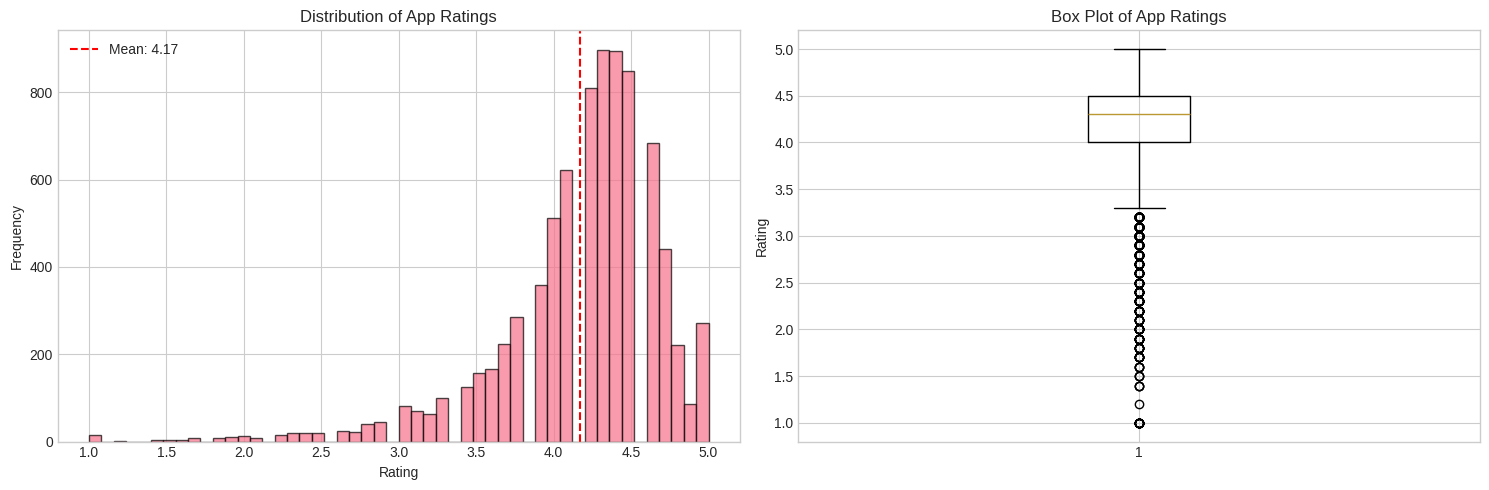

=== Rating Statistics ===
count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64
Skewness: -1.744
Kurtosis: 5.121


In [2]:
# Rating distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df_apps['Rating'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of App Ratings')
axes[0].axvline(df_apps['Rating'].mean(), color='red', linestyle='--', label=f'Mean: {df_apps["Rating"].mean():.2f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df_apps['Rating'], vert=True)
axes[1].set_ylabel('Rating')
axes[1].set_title('Box Plot of App Ratings')

plt.tight_layout()
plt.show()

# Statistical summary
print("=== Rating Statistics ===")
print(df_apps['Rating'].describe())
print(f"Skewness: {df_apps['Rating'].skew():.3f}")
print(f"Kurtosis: {df_apps['Rating'].kurtosis():.3f}")


### 3. Category Analysis

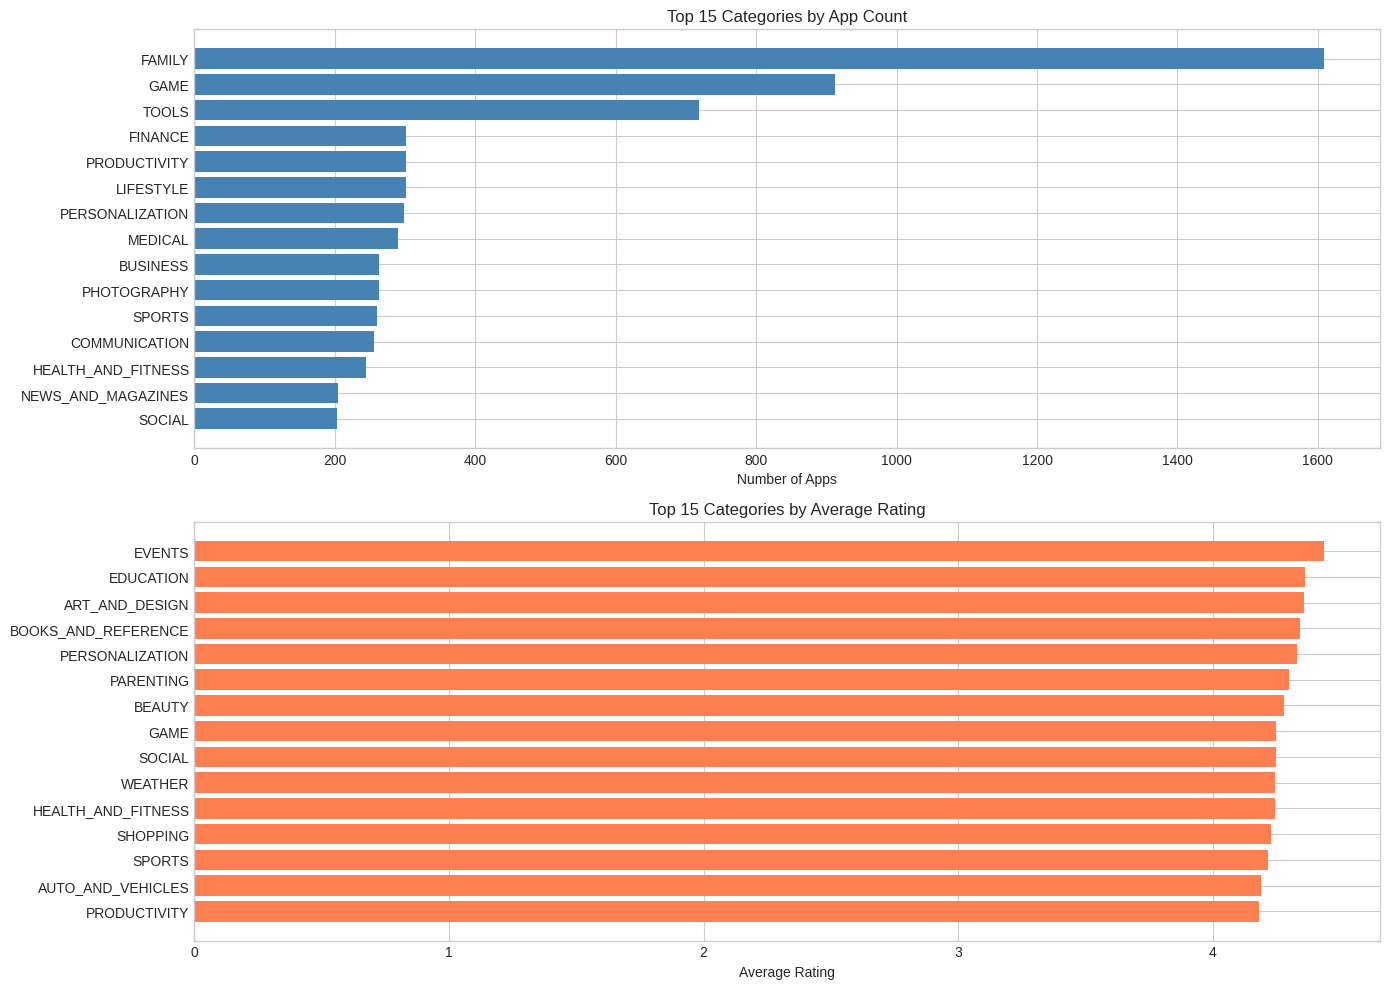


=== Category Statistics ===
Total categories: 33

Top 10 categories:
Category
FAMILY             1608
GAME                912
TOOLS               718
FINANCE             302
PRODUCTIVITY        301
LIFESTYLE           301
PERSONALIZATION     298
MEDICAL             290
BUSINESS            263
PHOTOGRAPHY         263
Name: count, dtype: int64


In [3]:
# Top categories by count
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Top 15 categories by app count
top_categories = df_apps['Category'].value_counts().head(15)
axes[0].barh(top_categories.index, top_categories.values, color='steelblue')
axes[0].set_xlabel('Number of Apps')
axes[0].set_title('Top 15 Categories by App Count')
axes[0].invert_yaxis()

# Average rating by category (top 15)
category_ratings = df_apps.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(15)
axes[1].barh(category_ratings.index, category_ratings.values, color='coral')
axes[1].set_xlabel('Average Rating')
axes[1].set_title('Top 15 Categories by Average Rating')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n=== Category Statistics ===")
print(f"Total categories: {df_apps['Category'].nunique()}")
print(f"\nTop 10 categories:\n{df_apps['Category'].value_counts().head(10)}")


### 4. Installs Analysis

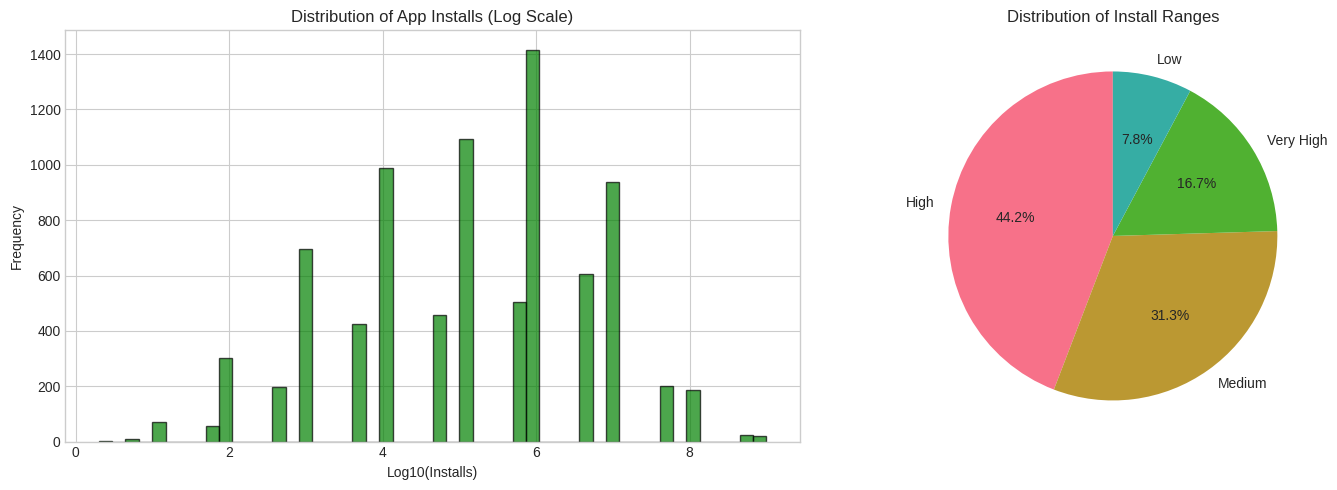


=== Top 10 Most Installed Apps ===
                                     App            Category     Installs  Rating
                       Google Play Books BOOKS_AND_REFERENCE 1000000000.0     3.9
Messenger – Text and Video Chat for Free       COMMUNICATION 1000000000.0     4.0
                      WhatsApp Messenger       COMMUNICATION 1000000000.0     4.4
            Google Chrome: Fast & Secure       COMMUNICATION 1000000000.0     4.3
                                   Gmail       COMMUNICATION 1000000000.0     4.3
                                Hangouts       COMMUNICATION 1000000000.0     4.0
           Skype - free IM & video calls       COMMUNICATION 1000000000.0     4.1
                       Google Play Games       ENTERTAINMENT 1000000000.0     4.3
                          Subway Surfers                GAME 1000000000.0     4.5
                                Facebook              SOCIAL 1000000000.0     4.1


In [4]:
# Distribution of installs
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Log scale histogram
axes[0].hist(np.log10(df_apps['Installs'] + 1), bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0].set_xlabel('Log10(Installs)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of App Installs (Log Scale)')

# Install ranges
install_counts = df_apps['Install_Range'].value_counts()
axes[1].pie(install_counts.values, labels=install_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution of Install Ranges')

plt.tight_layout()
plt.show()

# Top apps by installs
print("\n=== Top 10 Most Installed Apps ===")
top_installed = df_apps.nlargest(10, 'Installs')[['App', 'Category', 'Installs', 'Rating']]
print(top_installed.to_string(index=False))


### 5. Price Analysis

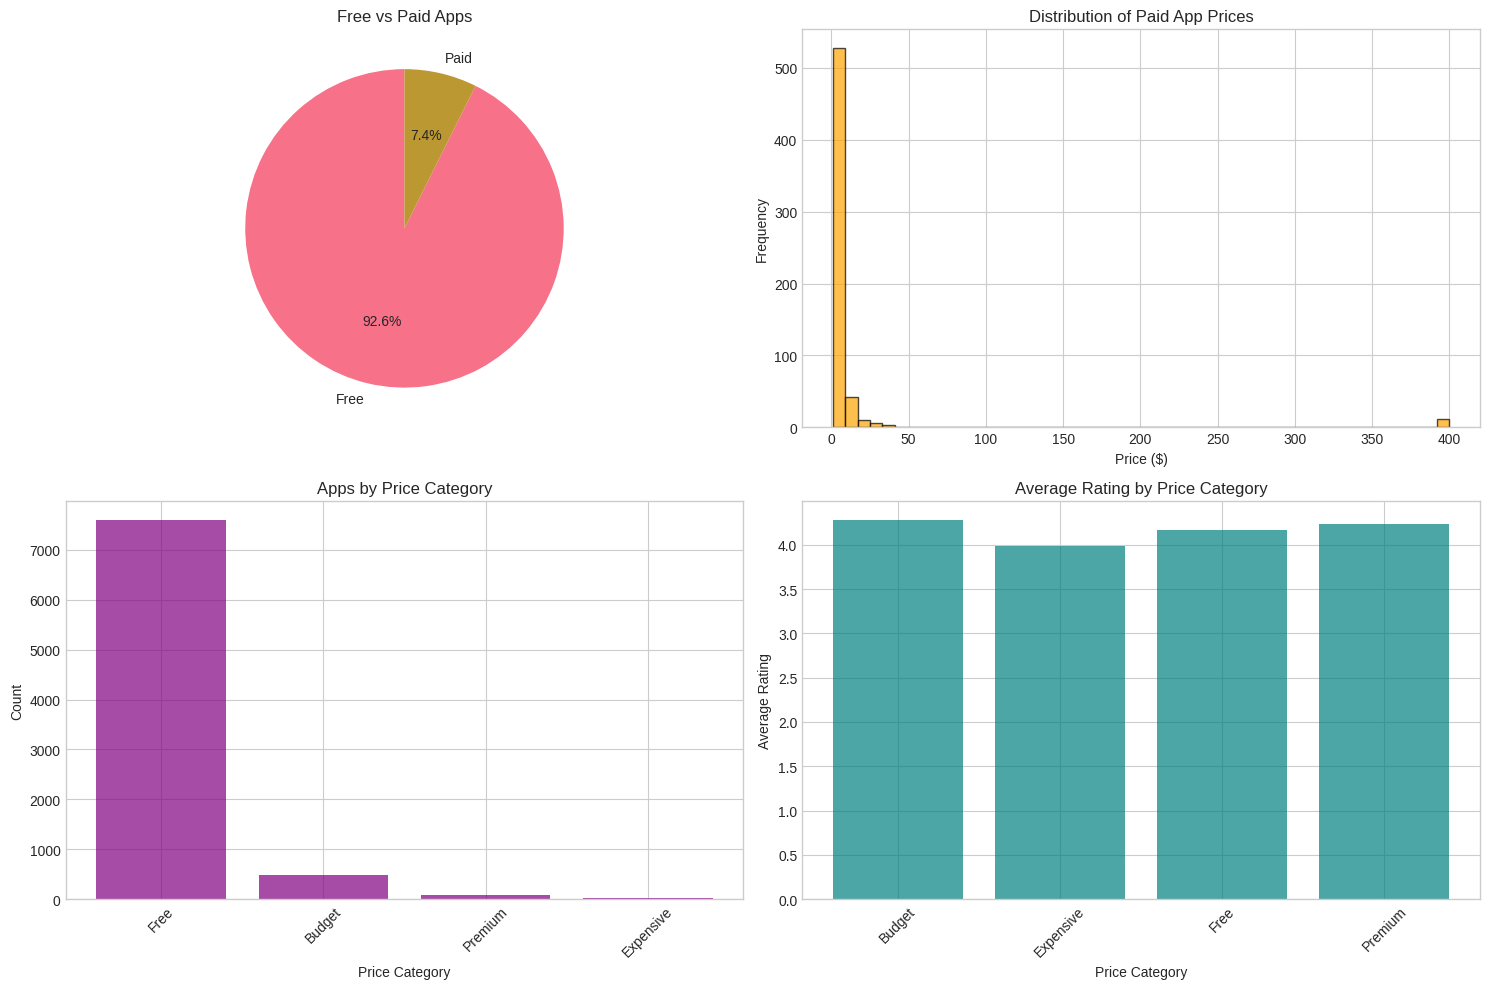


=== Price Statistics ===
Free apps: 7592
Paid apps: 604

Paid apps price range: $0.99 - $400.00
Average price: $14.08
Median price: $2.99


In [5]:
# Free vs Paid apps
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Type distribution
type_counts = df_apps['Type'].value_counts()
axes[0, 0].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Free vs Paid Apps')

# Price distribution (paid apps only)
paid_apps = df_apps[df_apps['Price'] > 0]
axes[0, 1].hist(paid_apps['Price'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Price ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Paid App Prices')

# Price category distribution
price_cat_counts = df_apps['Price_Category'].value_counts()
axes[1, 0].bar(price_cat_counts.index, price_cat_counts.values, color='purple', alpha=0.7)
axes[1, 0].set_xlabel('Price Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Apps by Price Category')
axes[1, 0].tick_params(axis='x', rotation=45)

# Average rating by price category
price_rating = df_apps.groupby('Price_Category')['Rating'].mean()
axes[1, 1].bar(price_rating.index, price_rating.values, color='teal', alpha=0.7)
axes[1, 1].set_xlabel('Price Category')
axes[1, 1].set_ylabel('Average Rating')
axes[1, 1].set_title('Average Rating by Price Category')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n=== Price Statistics ===")
print(f"Free apps: {(df_apps['Type'] == 'Free').sum()}")
print(f"Paid apps: {(df_apps['Type'] == 'Paid').sum()}")
print(f"\nPaid apps price range: ${paid_apps['Price'].min():.2f} - ${paid_apps['Price'].max():.2f}")
print(f"Average price: ${paid_apps['Price'].mean():.2f}")
print(f"Median price: ${paid_apps['Price'].median():.2f}")


### 6. Size Analysis

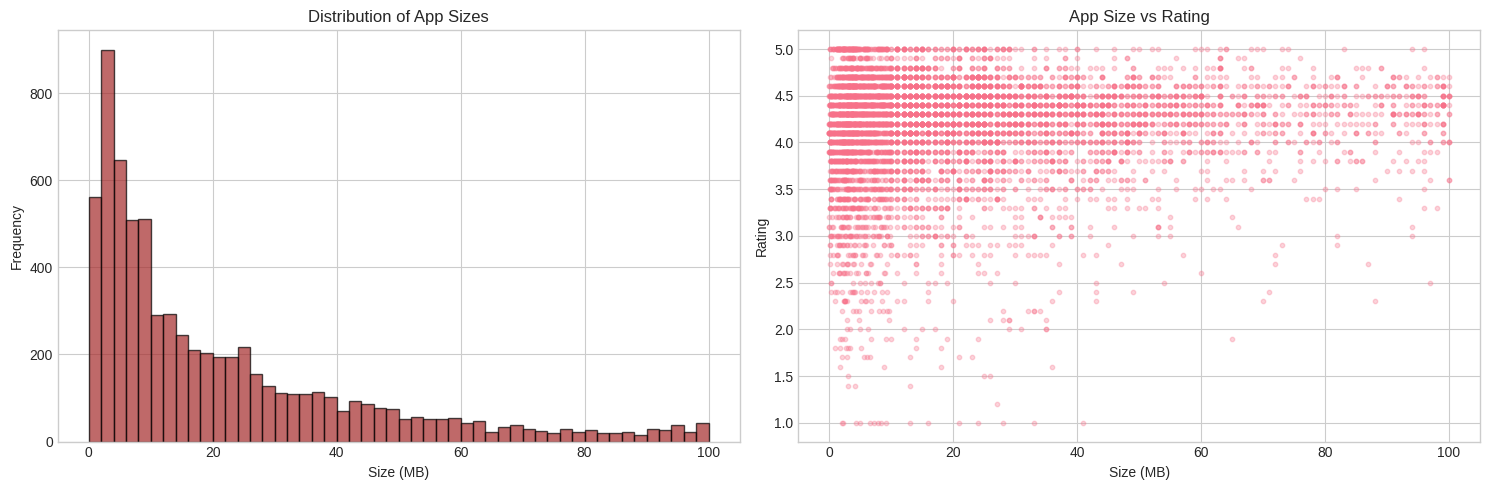


=== Size Statistics ===
count    7027.000000
mean       21.754060
std        22.726844
min         0.008301
25%         4.900000
50%        13.000000
75%        31.000000
max       100.000000
Name: Size, dtype: float64


In [6]:
# App size distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Size histogram
axes[0].hist(df_apps['Size'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='brown')
axes[0].set_xlabel('Size (MB)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of App Sizes')

# Size vs Rating scatter
axes[1].scatter(df_apps['Size'], df_apps['Rating'], alpha=0.3, s=10)
axes[1].set_xlabel('Size (MB)')
axes[1].set_ylabel('Rating')
axes[1].set_title('App Size vs Rating')

plt.tight_layout()
plt.show()

print("\n=== Size Statistics ===")
print(df_apps['Size'].describe())


### 7. Content Rating Analysis

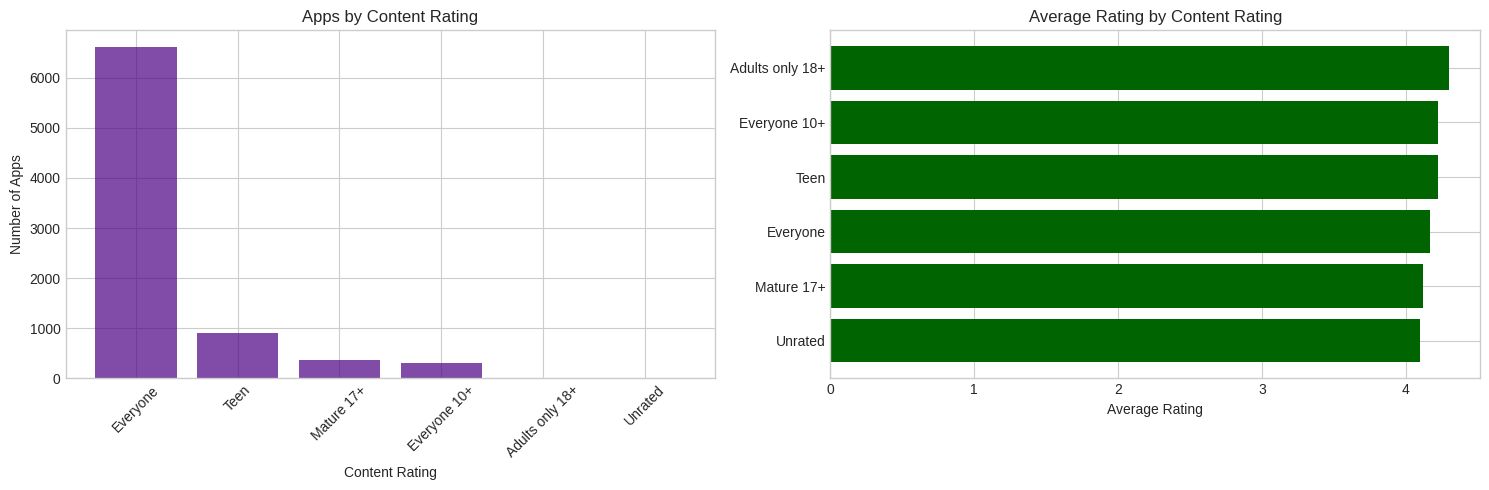


=== Content Rating Distribution ===
Content Rating
Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64


In [8]:
# Content rating distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count by content rating
content_counts = df_apps['Content Rating'].value_counts()
axes[0].bar(content_counts.index, content_counts.values, color='indigo', alpha=0.7)
axes[0].set_xlabel('Content Rating')
axes[0].set_ylabel('Number of Apps')
axes[0].set_title('Apps by Content Rating')
axes[0].tick_params(axis='x', rotation=45)

# Average rating by content rating
content_rating = df_apps.groupby('Content Rating')['Rating'].mean().sort_values()
axes[1].barh(content_rating.index, content_rating.values, color='darkgreen')
axes[1].set_xlabel('Average Rating')
axes[1].set_title('Average Rating by Content Rating')

plt.tight_layout()
plt.show()

print("\n=== Content Rating Distribution ===")
print(df_apps['Content Rating'].value_counts())


### 8. Correlation Analysis

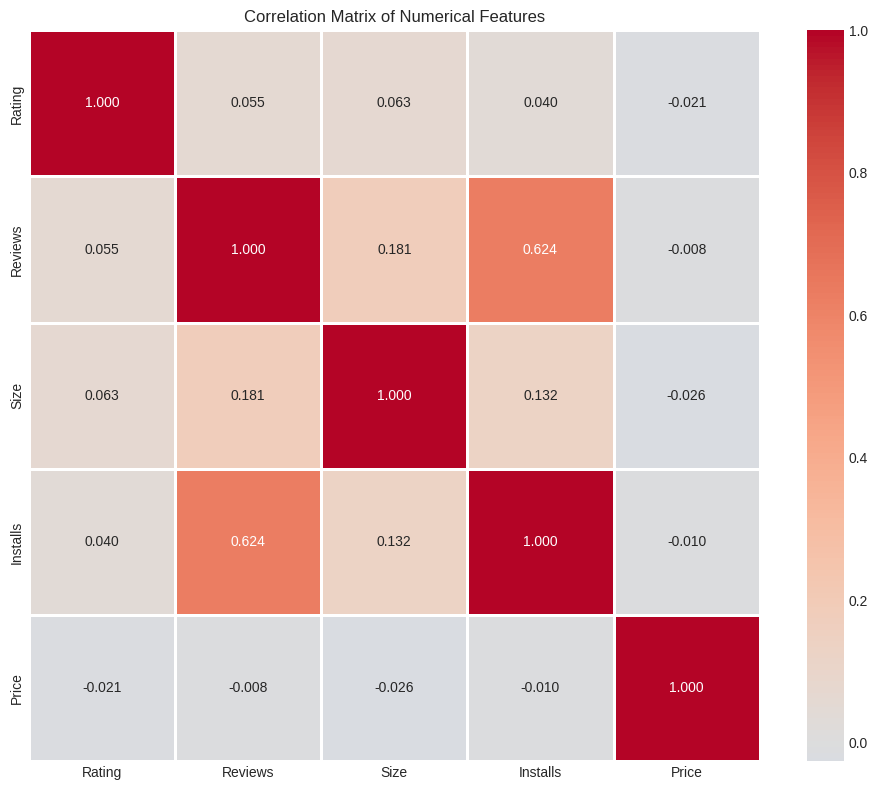


=== Key Correlations ===
Rating      1.000000
Size        0.063070
Reviews     0.055081
Installs    0.040143
Price      -0.021199
Name: Rating, dtype: float64


In [9]:
# Select numerical columns
numerical_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
correlation_matrix = df_apps[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.3f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

print("\n=== Key Correlations ===")
print(correlation_matrix['Rating'].sort_values(ascending=False))


### 9. Reviews and Ratings Relationship

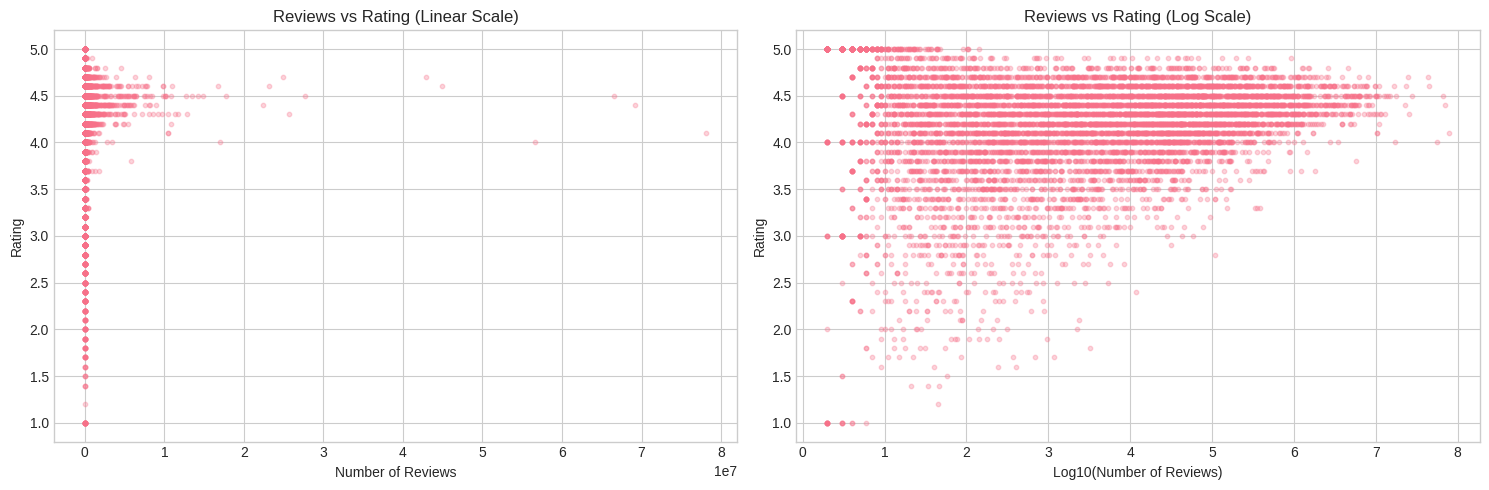


Correlation between Reviews and Rating: 0.055


In [10]:
# Reviews vs Rating scatter plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Linear scale
axes[0].scatter(df_apps['Reviews'], df_apps['Rating'], alpha=0.3, s=10)
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Rating')
axes[0].set_title('Reviews vs Rating (Linear Scale)')

# Log scale
axes[1].scatter(np.log10(df_apps['Reviews'] + 1), df_apps['Rating'], alpha=0.3, s=10)
axes[1].set_xlabel('Log10(Number of Reviews)')
axes[1].set_ylabel('Rating')
axes[1].set_title('Reviews vs Rating (Log Scale)')

plt.tight_layout()
plt.show()

# Correlation
print(f"\nCorrelation between Reviews and Rating: {df_apps['Reviews'].corr(df_apps['Rating']):.3f}")


### 10. Sentiment Analysis (Reviews Dataset)

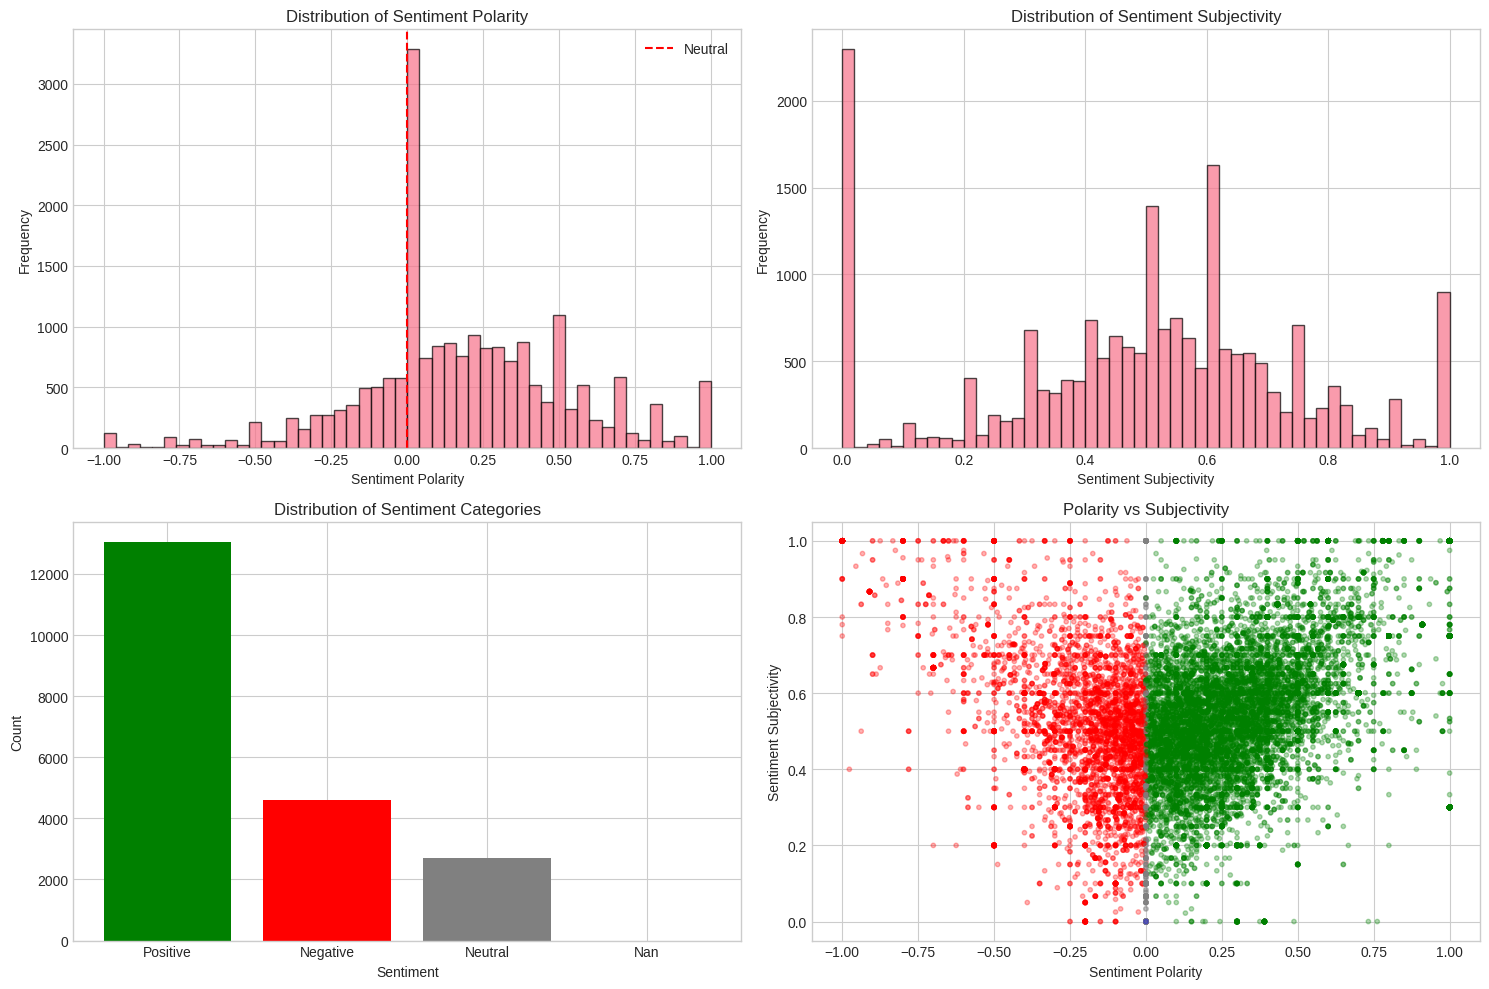


=== Sentiment Statistics ===
Sentiment
Positive    13052
Negative     4617
Neutral      2705
Nan             1
Name: count, dtype: int64

Average Polarity: 0.182
Average Subjectivity: 0.494


In [12]:
# Sentiment distribution (FIXED)

# Make a clean copy to avoid errors
df_plot = df_reviews.copy()

# Ensure numeric columns
df_plot['Sentiment_Polarity'] = pd.to_numeric(df_plot['Sentiment_Polarity'], errors='coerce')
df_plot['Sentiment_Subjectivity'] = pd.to_numeric(df_plot['Sentiment_Subjectivity'], errors='coerce')

# Standardize sentiment labels
df_plot['Sentiment'] = df_plot['Sentiment'].astype(str).str.title()

# Color map + fallback color
sentiment_color_map = {
    'Positive': 'green',
    'Neutral': 'gray',
    'Negative': 'red'
}

# Safe color mapping (NaN → blue)
colors = df_plot['Sentiment'].map(sentiment_color_map).fillna('blue')

# Remove rows that break scatter plot
df_scatter = df_plot.dropna(subset=['Sentiment_Polarity', 'Sentiment_Subjectivity'])

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sentiment polarity histogram
axes[0, 0].hist(df_plot['Sentiment_Polarity'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Sentiment Polarity')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Sentiment Polarity')
axes[0, 0].axvline(0, color='red', linestyle='--', label='Neutral')
axes[0, 0].legend()

# Sentiment subjectivity histogram
axes[0, 1].hist(df_plot['Sentiment_Subjectivity'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Sentiment Subjectivity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Sentiment Subjectivity')

# Sentiment category counts
sentiment_counts = df_plot['Sentiment'].value_counts()
axes[1, 0].bar(sentiment_counts.index, sentiment_counts.values,
               color=[sentiment_color_map.get(x, 'blue') for x in sentiment_counts.index])
axes[1, 0].set_xlabel('Sentiment')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of Sentiment Categories')

# Scatter plot (SAFE COLORING)
axes[1, 1].scatter(
    df_scatter['Sentiment_Polarity'],
    df_scatter['Sentiment_Subjectivity'],
    alpha=0.3,
    s=10,
    c=df_scatter['Sentiment'].map(sentiment_color_map).fillna('blue')
)

axes[1, 1].set_xlabel('Sentiment Polarity')
axes[1, 1].set_ylabel('Sentiment Subjectivity')
axes[1, 1].set_title('Polarity vs Subjectivity')

plt.tight_layout()
plt.show()

# Summary Stats
print("\n=== Sentiment Statistics ===")
print(df_plot['Sentiment'].value_counts())
print(f"\nAverage Polarity: {df_plot['Sentiment_Polarity'].mean():.3f}")
print(f"Average Subjectivity: {df_plot['Sentiment_Subjectivity'].mean():.3f}")
